In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv("https://raw.github.com/FMurunga/Marketing-Campaign-Analytics/main/ifood_df.csv")
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


1. Understanding of the data

In [28]:
df.shape

(2205, 39)

The dataset has 2205 rows and 39 columns

In [29]:
#checck for null values
df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [30]:
#df['education_Basic'].value_counts()[1]
df['education_Basic'].value_counts()[0]

2151

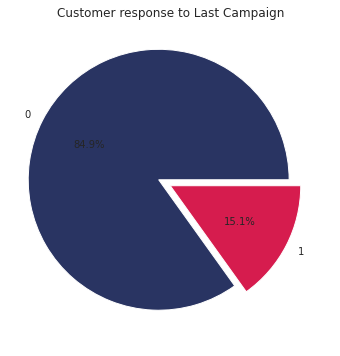

In [31]:
response_percentage = df['Response'].value_counts()*100/len(df)
explode = (0.1,0.0)
colors = ('#293462','#D61C4E')

_, ax = plt.subplots(figsize=(10,6))
ax = response_percentage \
.plot(kind='pie', autopct='%.1f%%',colors =colors, explode=explode)
ax.set_title("Customer response to Last Campaign")
ax.set_ylabel('')
plt.show()

Customer Demographic Information Analysis

In [32]:
#separate demographic data for EDA
df_demographics =df[['Income','Kidhome','Teenhome','Age',
                      'marital_Divorced','marital_Married','marital_Single','marital_Together','marital_Widow',
                      'education_2n Cycle','education_Basic','education_Graduation','education_Master','education_PhD']]
df_demographics.head()

,Income,Kidhome,Teenhome,Age,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD
0,58138.0,0,0,63,0,0,1,0,0,0,0,1,0,0
1,46344.0,1,1,66,0,0,1,0,0,0,0,1,0,0
2,71613.0,0,0,55,0,0,0,1,0,0,0,1,0,0
3,26646.0,1,0,36,0,0,0,1,0,0,0,1,0,0
4,58293.0,1,0,39,0,1,0,0,0,0,0,0,0,1


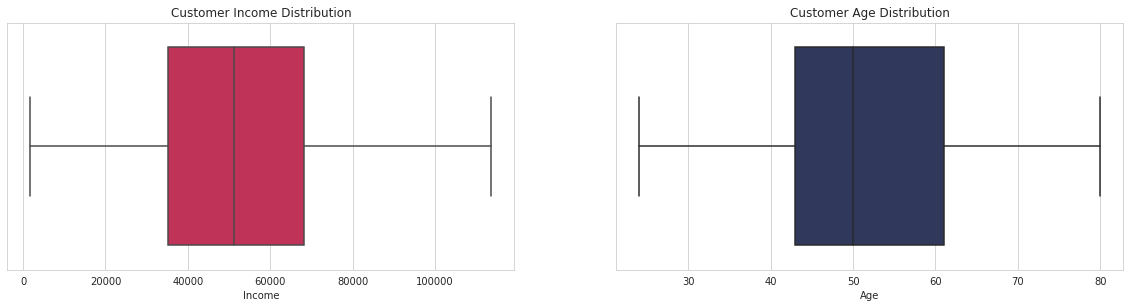

In [33]:
#@title Age and Income Distribution


plt.figure(figsize=(20,10))

sns.set_style(style='whitegrid')
plt.subplot(2,2,1)
plt.title('Customer Income Distribution')
sns.boxplot(x='Income',data=df_demographics,color='#D61C4E')
plt.subplot(2,2,2)
plt.title('Customer Age Distribution')
sns.boxplot(x='Age',data=df_demographics,color='#293462')


In [34]:

#customers marital status
married_folks= df_demographics['marital_Married'].value_counts()[1]
print("Married customers:",married_folks)

singles = df_demographics['marital_Single'].value_counts()[1]
print("Single customers:",singles)

divorced = df_demographics['marital_Divorced'].value_counts()[1]
print("Divorced customers:",divorced)

together = df_demographics['marital_Together'].value_counts()[1]
print("Married and still together customers:",together)

widowed = df_demographics['marital_Widow'].value_counts()[1]
print("Married and widowed:",widowed)



Married customers: 854
Single customers: 477
Divorced customers: 230
Married and still together customers: 568
Married and widowed: 76


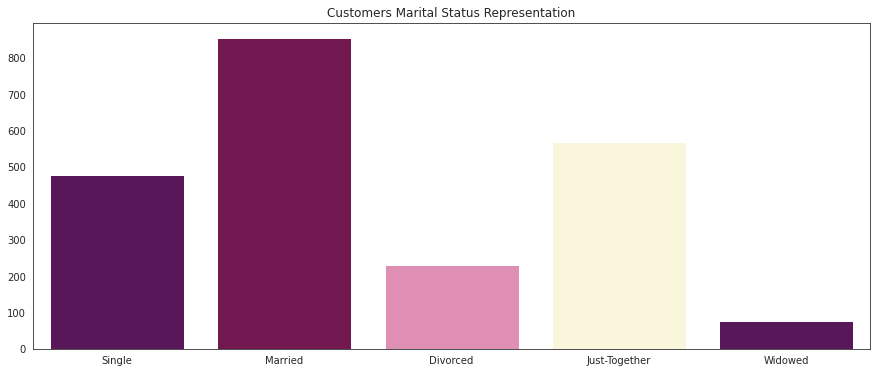

In [35]:
#@title Marital Status Distribution
status = ["Single","Married","Divorced","Just-Together","Widowed"]
colors = ("#610C63","#810955","#EE81B3","#FFF9D7")
y_axis = [singles,married_folks,divorced,together, widowed]
sns.set_style("white")
plt.figure(figsize=(15,6))
sns.barplot(x=status, y=y_axis,palette=colors).set(title='Customers Marital Status Representation')
plt.show()

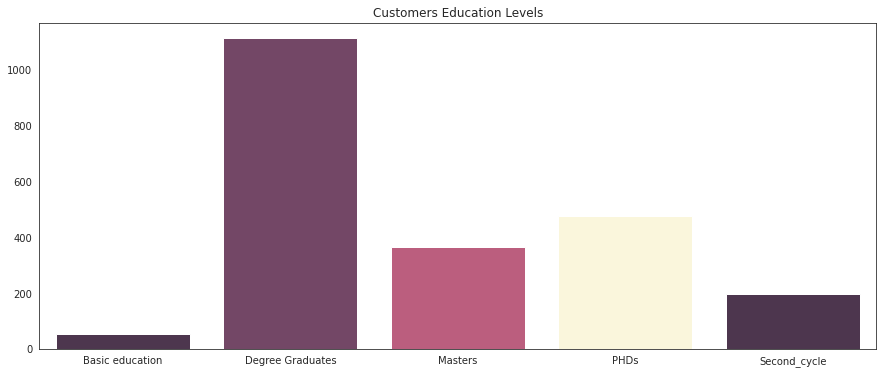

In [36]:
#@title Education Levels Distribution
#Education Status
basic_ed = df_demographics['education_Basic'].value_counts()[1]
degree = df_demographics['education_Graduation'].value_counts()[1]
masters = df_demographics['education_Master'].value_counts()[1]
phd = df_demographics['education_PhD'].value_counts()[1]
second_cycle = df_demographics['education_2n Cycle'].value_counts()[1]


education = ["Basic education","Degree Graduates","Masters","PHDs","Second_cycle"]
colors_ed = ("#513252","#7A4069","#CA4E79","#FFF9D7")

y_ed = [basic_ed,degree,masters,phd, second_cycle]
sns.set_style("white")
plt.figure(figsize=(15,6))
sns.barplot(x=education, y=y_ed,palette=colors_ed).set(title='Customers Education Levels')
plt.show()


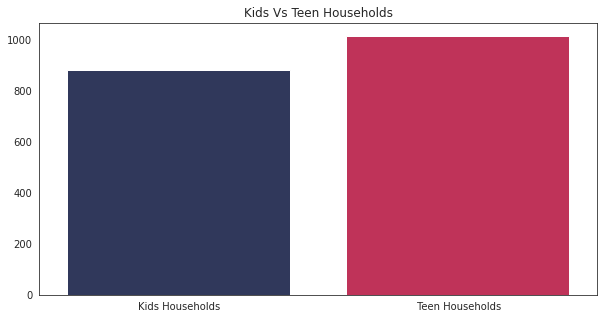

In [39]:
kids_households = df_demographics['Kidhome'].value_counts()[1]
teen_households = df_demographics['Teenhome'].value_counts()[1]

households = ["Kids Households"," Teen Households"]
colors_house= ("#293462","#D61C4E")
y_houses = [kids_households,teen_households]

sns.set_style("white")
plt.figure(figsize=(10,5))
sns.barplot(x=households, y=y_houses,palette=colors_house).set(title='Kids Vs Teen Households')
plt.show()
